<a href="https://colab.research.google.com/github/ThinhdanghocDE/BTL-AI/blob/main/BTL_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install hvplot


In [10]:
pip install ml-dtypes==0.5.1

In [11]:
pip install tensorboard==2.19.0

In [12]:
pip install tensorflow==2.19.0

In [14]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn import preprocessing
import itertools
from sklearn.model_selection import validation_curve
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
import hvplot.pandas
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

#**PHÂN TÍCH BỘ DỮ LIỆU GỐC**

##*Đọc dữ liệu*

In [16]:
df=pd.read_csv(r"/content/Goc.csv")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


##*a) Biểu đồ tần suất của biến mục tiêu deposit*

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Vẽ biểu đồ đếm cho biến 'deposit'
plt.figure(figsize=(8, 8))
ax = sns.countplot(
    x='deposit',
    data=df,
    hue='deposit',
    palette=['#5A9BD5', '#ED7D31'],
    order=['no', 'yes'],
    legend=False
)

# Thêm tiêu đề và nhãn
plt.title('Phân bố khách hàng có gửi tiền (Deposit)', fontsize=16)
plt.xlabel('Khách hàng có gửi tiền không?', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)

# Hiển thị số lượng và phần trăm BÊN TRONG cột
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,
        height * 0.5,  # Giữa cột
        f'{int(height)}\n({height/len(df)*100:.1f}%)',
        ha="center", va='center',
        fontsize=11, color='white', weight='bold'
    )

plt.show()


Biểu đồ "Tần suất của biến mục tiêu **deposit**" được sử dụng để đánh giá sự phân bố giữa các lớp dữ liệu, ở đây cụ thể là khách hàng có gửi tiền tiết kiệm hay không. Kết quả phân tích chỉ ra rằng bộ dữ liệu có sự cân bằng cao giữa hai lớp quyết định của khách hàng.

Cụ thể: Có 5.873 mẫu thuộc lớp "Không gửi tiền" (chiếm 52.6%) và 5.289 mẫu thuộc lớp "Gửi tiền" (chiếm 47.4%).

Kết luận: Sự cân bằng gần như 1:1 giữa hai lớp là một điều kiện lý tưởng để huấn luyện mô hình dự đoán. Điều này giúp giảm nguy cơ thiên lệch (bias) về phía nhóm chiếm đa số – một vấn đề thường gây khó khăn trong các bài toán phân loại. Nhờ đó, mô hình có thể học được đặc trưng của cả hai nhóm một cách khách quan hơn, từ đó nâng cao độ chính xác và tính khái quát khi áp dụng vào dữ liệu thực tế.

## *b) Biểu đồ Tỷ lệ gửi tiền theo Nghề nghiệp*

In [ ]:
plt.figure(figsize=(12, 8))

# Tạo bảng chéo
job_crosstab = pd.crosstab(df['job'], df['deposit'])
job_crosstab_pct = job_crosstab.div(job_crosstab.sum(axis=1), axis=0)

# Sắp xếp theo tỷ lệ 'yes' giảm dần
job_crosstab_pct_sorted = job_crosstab_pct.sort_values(by='yes', ascending=False)

# Vẽ biểu đồ stacked bar
ax = job_crosstab_pct_sorted.plot(kind='barh', stacked=True, figsize=(12, 8), color=['#5A9BD5', '#ED7D31'])

plt.title('Tỷ lệ Gửi tiền theo Nghề nghiệp', fontsize=16)
plt.xlabel('Tỷ lệ', fontsize=12)
plt.ylabel('Nghề nghiệp', fontsize=12)
plt.legend(title='Gửi tiền', labels=['Không', 'Có'])

# Thêm giá trị phần trăm lên từng thanh
for i, (index, row) in enumerate(job_crosstab_pct_sorted.iterrows()):
    left = 0  # vị trí bắt đầu của phần bar màu đầu tiên
    for j, col in enumerate(job_crosstab_pct_sorted.columns):
        width = row[col]
        if width > 0.01:  # chỉ hiện giá trị nếu phần trăm > 1%
            ax.text(left + width / 2, i, f'{width:.1%}', ha='center', va='center', color='white', fontsize=10)
        left += width

plt.show()


Phân tích biểu đồ cho thấy có một mối liên hệ rõ nét giữa nghề nghiệp của khách hàng và khả năng họ đăng ký sản phẩm tiền gửi. Cụ thể, nhóm "Sinh viên", "Đã nghỉ hưu" và "Thất nghiệp" có tỷ lệ gửi tiền cao nhất trong tất cả các nghề nghiệp được khảo sát. Ngược lại, những khách hàng làm "Công nhân" và trong ngành "Dịch vụ" lại có tỷ lệ đăng ký thấp hơn hẳn so với mức trung bình.

Điều này cho thấy nghề nghiệp là một yếu tố quan trọng giúp phân khúc khách hàng hiệu quả. Dựa trên kết quả này, các chiến dịch marketing nên tập trung nhiều hơn vào những nhóm có tỷ lệ chuyển đổi cao để tận dụng tối đa nguồn lực và nâng cao hiệu quả kinh doanh.



## *c) Phân tích ảnh hưởng của Tuổi (age) và Thời gian cuộc gọi (duration)*

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Biểu đồ hộp cho Tuổi và Gửi tiền
sns.boxplot(x='deposit', y='age', data=df, ax=axes[0], hue = 'deposit', palette=['#5A9BD5', '#ED7D31'], order=['no', 'yes'])
axes[0].set_title('Phân bố Tuổi theo Kết quả Gửi tiền', fontsize=14)
axes[0].set_xlabel('Có gửi tiền không?', fontsize=12)
axes[0].set_ylabel('Tuổi', fontsize=12)

# Biểu đồ hộp cho Thời gian cuộc gọi và Gửi tiền
sns.boxplot(x='deposit', y='duration', data=df, ax=axes[1], hue = 'deposit', palette=['#5A9BD5', '#ED7D31'], order=['no', 'yes'])
axes[1].set_title('Phân bố Thời gian Cuộc gọi theo Kết quả Gửi tiền', fontsize=14)
axes[1].set_xlabel('Có gửi tiền không?', fontsize=12)
axes[1].set_ylabel('Thời gian cuộc gọi (giây)', fontsize=12)

plt.tight_layout()
plt.show()

Biểu đồ hộp được dùng để so sánh phân bố của các biến số liên tục là age và duration giữa hai nhóm quyết định "Gửi tiền" và "Không gửi tiền".

Về Tuổi (age): Phân tích cho thấy không có sự khác biệt đáng kể về độ tuổi trung vị (median) giữa hai nhóm khách hàng. Điều này ngụ ý rằng tuổi tác không phải là một yếu tố mang tính quyết định hay phân biệt rõ ràng trong việc đăng ký sản phẩm tiền gửi của ngân hàng trong tập dữ liệu này.

Về Thời gian cuộc gọi (duration): Trái ngược với tuổi, thời gian cuộc gọi thể hiện một sự khác biệt mang ý nghĩa thống kê sâu sắc. Nhóm khách hàng quyết định gửi tiền có thời gian đàm thoại (cả giá trị trung vị và khoảng phân vị) cao hơn hẳn so với nhóm từ chối.

Kết luận: Thời gian cuộc gọi là một biến dự báo rất quan trọng, có thể phản ánh trực tiếp mức độ quan tâm và sự tương tác tích cực của khách hàng đối với sản phẩm được tư vấn. Trong khi đó, yếu tố tuổi tác lại có ảnh hưởng không đáng kể.

## *d) Biểu đồ so sánh thang đo các biến số*

In [ ]:
# Chọn các cột dữ liệu dạng số để vẽ biểu đồ
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df_numerical = df[numerical_cols]

# Vẽ biểu đồ
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_numerical, palette='viridis')
plt.title('So sánh Thang đo giữa các Biến số', fontsize=16)
plt.ylabel('Giá trị', fontsize=12)
plt.xlabel('Các biến số', fontsize=12)
plt.show()

Biểu đồ trên mang lại một cái nhìn trực quan và rõ ràng về vấn đề khác biệt thang đo giữa các biến trong tập dữ liệu.

1. Sự thống trị của biến balance
Biến balance (số dư tài khoản) có phạm vi giá trị và độ biến thiên (variance) lớn vượt trội so với các biến còn lại. Thang đo của nó lên tới hàng nghìn, trong khi hầu hết các biến khác chỉ dao động trong khoảng hàng chục hoặc hàng trăm. Điều này khiến cho biểu đồ hộp (box plot) của các biến còn lại gần như bị "nén xuống", rất khó quan sát chi tiết.

2. Sự chênh lệch giữa các biến
Ngay cả khi loại bỏ balance khỏi biểu đồ, chúng ta vẫn thấy sự khác biệt đáng kể về thang đo giữa các biến. Chẳng hạn, duration (thời gian cuộc gọi) thường có giá trị lên tới hàng trăm giây, trong khi age (tuổi) chủ yếu nằm ở mức vài chục, và các biến như campaign hay previous thường chỉ là những con số nhỏ (dưới 10).

3. Vì sao đây là vấn đề nghiêm trọng?
Với những mô hình nhạy cảm với khoảng cách như Mạng nơ-ron nhân tạo (ANN), sự khác biệt về thang đo này có thể gây hiểu nhầm nghiêm trọng. Chẳng hạn, một thay đổi nhỏ trong balance sẽ được mô hình coi là quan trọng hơn nhiều so với một thay đổi lớn trong age hay campaign, chỉ vì giá trị tuyệt đối của nó lớn hơn. Điều này không phản ánh đúng bản chất của dữ liệu và có thể khiến mô hình học sai lệch, dẫn đến kết quả không ổn định và kém chính xác.

KẾT LUẬN: Biểu đồ đã chỉ ra rất rõ rằng Chuẩn hóa dữ liệu (Data Scaling) là một bước bắt buộc trong quá trình tiền xử lý, đặc biệt khi áp dụng các mô hình học sâu như ANN. Đây không phải là một lựa chọn tùy ý, mà là điều kiện tiên quyết để đảm bảo mô hình có thể học một cách công bằng và hiệu quả từ tất cả các đặc trưng đầu vào.


## *e) So ánh tần xuất của các thuộc tính*

In [ ]:
df_yes = df[df['deposit'] == 'yes']
df_no = df[df['deposit'] == 'no']
# Vẽ histogram cho nhóm 'yes'
plt.figure(figsize=(12, 12))
df_yes.hist(figsize=(12, 12))
plt.suptitle("Tần suất các thuộc tính với khách hàng gửi tiền (deposit = yes)", fontsize=16)
plt.show()

In [ ]:
# Vẽ histogram cho nhóm 'yes'
plt.figure(figsize=(12, 12))
df_no.hist(figsize=(12, 12))
plt.suptitle("Tần suất các thuộc tính với khách hàng gửi tiền (deposit = no)", fontsize=16)
plt.show()

####Nhận xét về 2 biểu đồ với deposit(yes/no):
 1. Age (Tuổi)
Cả hai nhóm khách hàng gửi tiền (yes) và không gửi tiền (no) đều tập trung nhiều trong độ tuổi 30–40. Tuy nhiên, nhóm gửi tiền có độ tuổi phân bố rộng hơn, đặc biệt xuất hiện nhiều hơn ở các nhóm tuổi từ 50 trở lên. Điều này cho thấy người lớn tuổi hơn có xu hướng gửi tiền cao hơn, có thể do họ có sự ổn định tài chính và nhu cầu tiết kiệm lớn hơn.
 2. Balance (Số dư tài khoản)
Cả hai nhóm đều có phần lớn khách hàng với số dư thấp. Tuy vậy, ở nhóm gửi tiền, có một số lượng đáng kể khách hàng có số dư cao hơn rất nhiều, lên đến hàng chục nghìn. Điều này cho thấy những khách hàng có số dư tài khoản cao thường có khả năng gửi tiền cao hơn – đây là một chỉ báo tài chính quan trọng cần được đưa vào mô hình dự đoán.
 3. Day (Ngày gọi)
Phân bố ngày gọi trong tháng ở hai nhóm gần như giống nhau và khá đồng đều. Không có sự khác biệt rõ rệt giữa khách hàng gửi và không gửi tiền theo ngày gọi. Vì vậy, thuộc tính này có thể ít tác động đến quyết định gửi tiền, hoặc không phải là yếu tố chính.
 4. Month (Tháng gọi)
Ở nhóm không gửi tiền, số lượng khách hàng tập trung rất nhiều trong tháng 5, cho thấy đây có thể là tháng chiến dịch gọi diễn ra mạnh nhưng không hiệu quả. Ngược lại, nhóm gửi tiền có phân bố đều hơn ở các tháng khác, như tháng 8 và 10. Điều này gợi ý rằng tháng gọi ảnh hưởng đến hiệu quả chiến dịch, và cần cân nhắc lại chiến lược tiếp cận trong từng thời điểm cụ thể.
 5. Duration (Thời lượng cuộc gọi)
Đây là một trong những thuộc tính thể hiện sự khác biệt rõ rệt nhất. Nhóm gửi tiền có nhiều cuộc gọi kéo dài hơn, trong khi nhóm không gửi chủ yếu là những cuộc gọi rất ngắn. Có thể thấy rằng thời lượng cuộc gọi càng dài thì khả năng thuyết phục khách hàng gửi tiền càng cao, do đó đây là yếu tố rất quan trọng để đưa vào mô hình AI.
 6. Campaign (Số lần liên hệ trong chiến dịch)
Khách hàng gửi tiền thường chỉ được liên hệ 1–2 lần, trong khi nhóm không gửi có nhiều người bị gọi nhiều hơn, thậm chí tới hơn 10 lần. Việc liên hệ quá nhiều có thể tạo cảm giác làm phiền, phản tác dụng. Do đó, số lần gọi hợp lý sẽ nâng cao hiệu quả chiến dịch.
 7. Pdays (Số ngày kể từ lần gọi trước)
Nhóm gửi tiền có phân bố rộng hơn ở thuộc tính pdays, nghĩa là họ đã từng được gọi trước đây và khoảng thời gian giữa các lần gọi không quá xa. Trong khi đó, nhóm không gửi chủ yếu có giá trị pdays cao hoặc đặc biệt (999), tức là chưa từng được gọi. Khách hàng đã từng được chăm sóc trước đó có xu hướng gửi tiền cao hơn, nên đây cũng là một chỉ báo tốt.
 8. Previous (Số lần liên hệ trước chiến dịch hiện tại)
Tương tự như pdays, nhóm gửi tiền có xu hướng đã từng được tiếp cận trong quá khứ. Nhóm không gửi tiền phần lớn chưa từng được liên hệ. Điều này tiếp tục khẳng định rằng lịch sử chăm sóc khách hàng là một yếu tố quan trọng giúp nâng cao tỷ lệ gửi tiền.



## *f) Ma trận tương quan giữa các biến số*

In [ ]:
# Thêm cột mục tiêu đã được mã hóa vào để phân tích tương quan
# Điều này giúp ta thấy biến số nào có ảnh hưởng mạnh nhất đến kết quả
numeric_data['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# Tính toán ma trận tương quan
corr_numeric = numeric_data.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_numeric, annot=True, fmt='.2f', cmap='RdBu_r', cbar=True)
plt.title("Ma trận Tương quan giữa các Biến số và Biến mục tiêu", fontsize=16)
plt.show()

Dựa vào ma trận tương quan, ta thấy rằng biến có ảnh hưởng mạnh nhất đến quyết định gửi tiền của khách hàng là thời lượng cuộc gọi (duration), với hệ số tương quan khá cao (0.45). Điều này hoàn toàn hợp lý vì những cuộc gọi dài thường thể hiện mức độ quan tâm hoặc sự thuyết phục thành công từ phía nhân viên tư vấn. Ngoài ra, các biến liên quan đến lịch sử tương tác như pdays và previous cũng cho thấy mối liên hệ tích cực với hành vi gửi tiền – nghĩa là nếu khách hàng từng được liên hệ trước đó, họ có xu hướng dễ đồng ý hơn. Ngược lại, biến campaign lại có tương quan âm, cho thấy việc gọi quá nhiều lần trong cùng một chiến dịch có thể gây phản tác dụng, khiến khách hàng cảm thấy phiền và từ chối. Những yếu tố như tuổi (age) hay số dư tài khoản (balance) có vẻ không ảnh hưởng nhiều, vì mức tương quan với biến mục tiêu là rất nhỏ. Tóm lại, nếu muốn xây dựng một mô hình dự đoán hiệu quả, ta nên tập trung vào những yếu tố thể hiện mức độ tương tác và hiệu quả của cuộc gọi hơn là thông tin cá nhân đơn thuần.

## *g) Nhận xét bộ dữ liệu gốc*

###I. Điểm Tốt (Có thể giữ lại hoặc sử dụng trực tiếp)

Sự Cân Bằng của Biến Mục Tiêu (deposit):

- Hiện trạng: Tỷ lệ giữa lớp "Gửi tiền" (47.4%) và "Không gửi tiền" (52.6%) gần như là 1:1.
- Đánh giá: Đây là ưu điểm lớn nhất của bộ dữ liệu. Nó cho phép chúng ta xây dựng mô hình mà không cần áp dụng các kỹ thuật xử lý mất cân bằng phức tạp (như SMOTE hay điều chỉnh trọng số lớp). Mô hình sẽ học được đặc điểm của cả hai lớp một cách công bằng, và các chỉ số đánh giá như độ chính xác (accuracy) sẽ trở nên đáng tin cậy hơn.

Tính Hoàn Chỉnh của Dữ liệu (Không có giá trị thiếu):

- Hiện trạng: Bộ dữ liệu không chứa các ô giá trị bị bỏ trống (null/NaN).
- Đánh giá: Điều này giúp chúng ta tiết kiệm được một bước xử lý dữ liệu phức tạp là điền giá trị thiếu (imputation). Dữ liệu sạch và đầy đủ cho phép chúng ta tiến thẳng đến các bước xử lý quan trọng hơn.


###II. Điểm Cần Cải Thiện (Yêu cầu Tiền xử lý)

Sự tồn tại của Dữ liệu dạng Chuỗi (Categorical Data):

- Hiện trạng: Rất nhiều cột quan trọng đang ở định dạng văn bản, không phải dạng số. Ví dụ: job, marital, education, contact, poutcome, month. Các cột nhị phân như default, housing, loan, deposit cũng đang là 'yes'/'no'.
- Vấn đề: Mô hình ANN chỉ có thể xử lý các con số. Nó không hiểu được giá trị "management" hay "married" có ý nghĩa gì.

Giải pháp tiền xử lý:

- Mã hóa One-Hot (One-Hot Encoding): Đối với các cột có nhiều hơn hai loại giá trị (ví dụ: job, education), chúng ta cần chuyển mỗi giá trị thành một cột nhị phân (0/1) riêng biệt.
- Mã hóa Nhị phân (Binary Encoding): Đối với các cột chỉ có hai giá trị 'yes'/'no' (ví dụ: housing, loan, và chính cột deposit), chúng ta sẽ chuyển đổi chúng thành 0 và 1.

Sự khác biệt về Thang đo giữa các Biến số:
- Hiện trạng: Các cột số có đơn vị và khoảng giá trị rất khác nhau. Ví dụ, balance (số dư tài khoản) có thể lên tới hàng chục nghìn, trong khi campaign (số lần liên hệ) thường chỉ là những con số nhỏ.
- Vấn đề: Khi đưa vào mô hình ANN, các thuộc tính có giá trị lớn (như balance) sẽ "lấn át" và có tác động không cân xứng lên quá trình học so với các thuộc tính có giá trị nhỏ, làm cho mô hình hội tụ chậm và kém hiệu quả.

Giải pháp tiền xử lý:
- Chuẩn hóa Dữ liệu (Scaling): Chúng ta cần đưa tất cả các biến số về một thang đo chung. Phương pháp phổ biến là Standardization (Chuẩn hóa Z-score), giúp biến đổi dữ liệu sao cho có giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1.

#**TIỀN XỬ LÝ DỮ LIỆU**

###Kiểm tra thông tin dữ liệu của các thuộc tính

In [17]:
for col in df.columns:
    print(df.groupby([col]).size())

age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Length: 76, dtype: int64
job
admin.           1334
blue-collar      1944
entrepreneur      328
housemaid         274
management       2566
retired           778
self-employed     405
services          923
student           360
technician       1823
unemployed        357
unknown            70
dtype: int64
marital
divorced    1293
married     6351
single      3518
dtype: int64
education
primary      1500
secondary    5476
tertiary     3689
unknown       497
dtype: int64
default
no     10994
yes      168
dtype: int64
balance
-6847     1
-3058     1
-2712     1
-2282     1
-2049     1
         ..
 51439    1
 52587    2
 56831    1
 66653    1
 81204    2
Length: 3805, dtype: int64
housing
no     5881
yes    5281
dtype: int64
loan
no     9702
yes    1460
dtype: int64
contact
cellular     8042
telephone     774
unknown      2346
dtype: int64
day
1     122
2     334
3     306
4     402
5   

###Kiểm tra dữ liệu thiếu

In [18]:
print('Số lượng dữ liệu bị thiếu là:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Số lượng dữ liệu bị thiếu là:
	age: 0
	job: 0
	marital: 0
	education: 0
	default: 0
	balance: 0
	housing: 0
	loan: 0
	contact: 0
	day: 0
	month: 0
	duration: 0
	campaign: 0
	pdays: 0
	previous: 0
	poutcome: 0
	deposit: 0


In [19]:
print('Số lượng bản ghi bị trùng lặp là:')
len(df)-len(df.drop_duplicates())

Số lượng bản ghi bị trùng lặp là:


0

In [20]:
print(df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object


###Chia tập dữ liệu train và test

In [21]:
# Tách biến độc lập (X) và biến mục tiêu (y)
X = df.drop('deposit', axis=1)
y = df['deposit'].map({'yes': 1, 'no': 0})

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra TRƯỚC KHI xử lý
# Điều này đảm bảo không có sự rò rỉ thông tin từ tập test sang tập train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Chuyển giá trị của cột month từ dạng chữ sang số sau đó đưa về vị trí cũ để phù hợp với bài toán đang xét

In [22]:
from datetime import datetime
df['month_number'] = df['month'].apply(lambda x: datetime.strptime(x, "%b").month)
df = df.drop(columns=['month'])
df = df.rename(columns={'month_number': 'month'})
# Lấy danh sách các cột hiện tại
columns = list(df.columns)
# Xóa cột 'month' khỏi vị trí cũ
columns.remove('month')
# Xác định vị trí của cột 'day'
day_index = columns.index('day')
# Chèn 'month' vào ngay sau 'day'
columns.insert(day_index + 1, 'month')
# Sắp xếp lại DataFrame theo thứ tự cột mới
df = df[columns]
# Hiển thị Data sau khi thay đổi
print(df.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day  month  duration  campaign  pdays  previous poutcome deposit  
0    5      5      1042         1     -1         0  unknown     yes  
1    5      5      1467         1     -1         0  unknown     yes  
2    5      5      1389         1     -1         0  unknown     yes  
3    5      5       579         1     -1         0  unknown     yes  
4    5      5       673         2     -1         0  unknown     yes  


### Xác định các nhóm cột trong tập train

In [23]:
# 1. Xác định các nhóm cột trong tập train
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

### Xử lý các cột dạng chữ sử dụng kỹ thuật One-Hot Encoding.

In [24]:
# Tạo một transformer để áp dụng One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

### Xử lý các biến số

#### Biểu đồ tương quan giữa các biến số

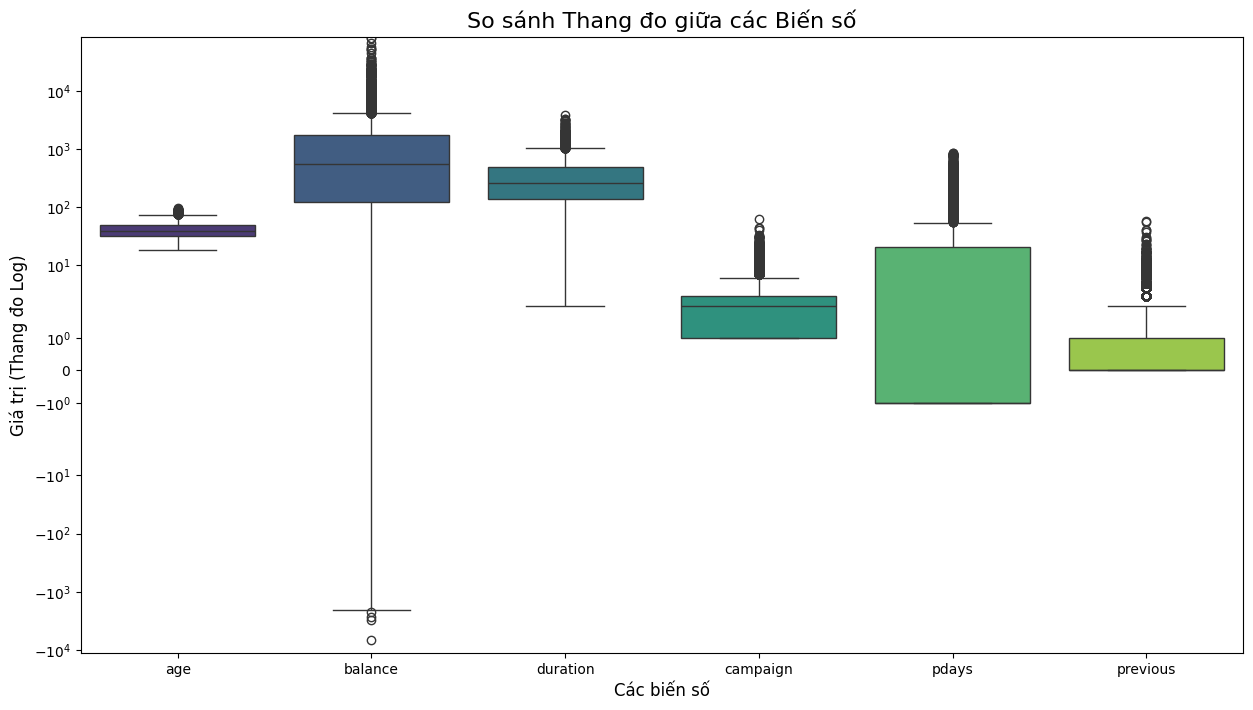

In [25]:
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df_numerical = df[numerical_cols]

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_numerical, palette='viridis')
plt.title('So sánh Thang đo giữa các Biến số', fontsize=16)
plt.yscale('symlog') # Sử dụng thang đo log để quan sát các biến nhỏ dễ hơn
plt.ylabel('Giá trị (Thang đo Log)', fontsize=12)
plt.xlabel('Các biến số', fontsize=12)
plt.show()

Biểu đồ hộp (boxplot) trên thể hiện cấu trúc của các biến số, có sử dụng thang đo log đối xứng cho trục tung (symlog):
1. Vai trò của thang đo symlog: Việc sử dụng thang đo symlog giúp quan sát đồng thời các biến có thang đo rất nhỏ (ví dụ như campaign, previous) và các biến có thang đo rất lớn (ví dụ như balance, duration) một cách rõ ràng. Nếu sử dụng các thang đo tuyến tính thông thường thì các hộp của các biến có thang đo rất nhỏ như campaign, previous sẽ được biểu thị gần như là 1 đường thẳng, rất khó để quan sát.
2. Sự khác biệt về độ phân tán (IQR - Thân hộp): Thân hộp (box) đại diện cho 50% dữ liệu nằm ở trung tâm (từ phân vị 25 đến 75 trong tứ phân vị). Nhìn vào biểu đồ bên trên, chúng ta quan sát được phần thân hộp của 2 biến số balance và duration lớn hơn đáng kể so với các biến age, campaign, pdays và previous, chứng tỏ rằng ngay cả phần dữ liệu cốt lõi của chúng cũng có độ phân tán và khoảng giá trị lớn hơn nhiều so với các biến số còn lại.
3. Mức độ của các giá trị ngoại lai (Outliers - Các chấm tròn): Các chấm tròn bên ngoài râu của hộp xếp chồng lên nhau chính là các giá trị ngoại lai. Biến số balance có rất nhiều giá trị ngoại lai ở cả hai phía âm và dương, một số điểm vươn tới các giá trị cực kì lớn. 2 biến số duration và pdays cũng có nhiều giá trị ngoại lai đáng chú ý. Ngay cả 2 biến số có thang đo nhỏ như campaign và previous cũng tồn tại các giá trị ngoại lai.
4. Kết luận: Dựa vào biểu đồ, chúng ta nhận thấy được cần phải thực hiện chuẩn hóa dữ liệu và có 2 vấn đề chính cần giải quyết:
- Khác biệt thang đo: Độ lớn và độ phân tán của các biến là hoàn toàn khác nhau.
- Tồn tại giá trị ngoại lai: Các giá trị ngoại lai có mặt ở hầu hết các biến và có thể làm sai lệch quá trình học của mô hình.
Để giải quyết 2 vấn đề trên, chúng ta sẽ sử dụng RobustScaler, vì RobustScaler được thiết kế để xử lý hiệu quả cả 2 vấn đề này bằng cách sử dụng các đại lượng thống kê bền vững là median và IQR.

#### Tạo bảng thống kê mô tả biểu đồ

In [26]:
# 1. Tạo một danh sách các cột số cần phân tích
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# 2. Chọn các cột này từ DataFrame gốc
df_numerical = df[numerical_cols]

# 3. Sử dụng hàm .describe() để tính toán và tạo bảng thống kê
statistical_table = df_numerical.describe()

# 4. In bảng kết quả ra màn hình
print(statistical_table)

                age       balance      duration      campaign         pdays  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524    371.993818      2.508421     51.330407   
std       11.913369   3225.413326    347.128386      2.722077    108.758282   
min       18.000000  -6847.000000      2.000000      1.000000     -1.000000   
25%       32.000000    122.000000    138.000000      1.000000     -1.000000   
50%       39.000000    550.000000    255.000000      2.000000     -1.000000   
75%       49.000000   1708.000000    496.000000      3.000000     20.750000   
max       95.000000  81204.000000   3881.000000     63.000000    854.000000   

           previous  
count  11162.000000  
mean       0.832557  
std        2.292007  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max       58.000000  


1. So sánh độ phân tán (std - Độ lệch chuẩn):
- Độ lệch chuẩn của balance là 3225.41.
- Độ lệch chuẩn của campaign chỉ là 2.72.
- Dựa vào 2 độ lệch chuẩn trên ta thấy mức độ phân tán của dữ liệu balance lớn hơn 1185 lần so với campaign, Một mô hình như ANN sẽ dễ bị hiểu lầm rằng balance là một thuộc tính quan trọng hơn thuộc tính campaign hơn 1000 lần.
2. So sánh khoảng giá trị (min và max):
- balance có khoảng giá trị cực kì lớn, từ -6847 (khoảng âm này có thể là thấu chi - rút tiền vượt quá số dư trong tài khoản ngân hàng) đến 81204.
- age chỉ chạy từ 18 đến 95.
- campaign chỉ chạy từ 1 đến 63.
- Dựa vào 3 khoảng giá trị trên, ta thấy giá trị lớn nhất của balance lớn hơn giá trị lớn nhất của campaign tới 1288 lần. Sự chênh lệch rất lớn này sẽ khiến các thuật toán dựa trên khoảng cách như KNN hoặc dựa trên gradient như ANN hoạt động không chính xác.
3. Bằng chứng về giá trị ngoại lai (so sánh 50% và max):
- 50% khách hàng có số dư tài khoản dưới 550 (50% hay median) nhưng giá trị lớn nhất lại lên tới 81204. Điều này cho thấy phần lớn dữ liệu tập trung ở một khoảng giá trị thấp nhưng có một số ít các giá trị rất lớn (outliers) đang kéo toàn bộ thang đo của biến này ra xa. Đây chính là lý do việc sử dụng RobustScaler - dựa trên median và IQR, sẽ hiệu quả hơn StandardScaler - dựa trên mean và std.
4. Kết luận:
Dựa trên các thông số định lượng trên, chúng ta thấy được rằng việc chuẩn hóa thang đo là một yêu cầu bắt buộc. Nếu không thực hiện thì mô hình sẽ bị chi phối bởi các đặc điểm có thang đo lớn một cách tùy tiện, dẫn đến kết quả dự báo không đáng tin cậy. Dữ liệu này chứng minh sự cần thiết phải áp dụng một phương pháp chuẩn hóa mạnh mẽ, sử dụng RobustScaler, để đảm bảo tất cả các thuộc tính đều có cơ hội đóng góp một cách công bằng vào mô hình.

### Sử dụng RobustScaler chuẩn hóa các cột dữ liệu dạng số

In [27]:
from sklearn.preprocessing import RobustScaler
numeric_transformer = RobustScaler()

### Kết hợp

In [28]:
from sklearn.compose import ColumnTransformer
# 3. Kết hợp các bước xử lý
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


### Đưa về tập train và *test*

In [29]:
# 4. Fit và transform trên tập train
X_train_processed = preprocessor.fit_transform(X_train)

# 5. Chỉ transform trên tập test
X_test_processed = preprocessor.transform(X_test)

print("Tiền xử lý hoàn tất!")
print(f"Số lượng cột ban đầu: {X_train.shape[1]}")
print(f"Số lượng cột sau khi xử lý: {X_train_processed.shape[1]}")

Tiền xử lý hoàn tất!
Số lượng cột ban đầu: 16
Số lượng cột sau khi xử lý: 51


###Phân tích bộ dữ liệu trước khi huấn luyện

In [31]:
# Kích thước của dữ liệu huấn luyện gốc
print(f"Kích thước X_train gốc: {X_train.shape}")

# Kích thước của dữ liệu huấn luyện sau khi xử lý
# Dữ liệu này có thể là một ma trận thưa (sparse matrix)
print(f"Kích thước X_train sau xử lý: {X_train_processed.shape}")

Kích thước X_train gốc: (8929, 16)
Kích thước X_train sau xử lý: (8929, 51)


Có thể thấy số hàng được giữ nguyên, nhưng số cột đã tăng lên đáng kể (ví dụ, từ 16 lên 51). Điều này xác nhận rằng các cột phân loại đã được "nở" ra thành nhiều cột nhị phân mới.

In [32]:
# Lấy ra danh sách các cột số
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Chỉ áp dụng RobustScaler lên các cột số của tập train
X_train_numerical_scaled = preprocessor.named_transformers_['num'].transform(X_train[numerical_features])

# Chuyển kết quả thành DataFrame để dễ phân tích
df_scaled_numerical = pd.DataFrame(X_train_numerical_scaled, columns=numerical_features)

# Sử dụng .describe() để xem bảng thống kê sau khi chuẩn hóa
print("Bảng thống kê các biến số SAU KHI chuẩn hóa bằng RobustScaler:")
print(df_scaled_numerical.describe().round(2))

Bảng thống kê các biến số SAU KHI chuẩn hóa bằng RobustScaler:
           age  balance      day  duration  campaign    pdays  previous
count  8929.00  8929.00  8929.00   8929.00   8929.00  8929.00   8929.00
mean      0.12     0.59     0.05      0.33      0.25     1.35      0.83
std       0.70     1.89     0.60      0.97      1.39     2.80      2.33
min      -1.24    -4.71    -1.00     -0.71     -0.50     0.00      0.00
25%      -0.41    -0.27    -0.50     -0.33     -0.50     0.00      0.00
50%       0.00     0.00     0.00      0.00      0.00     0.00      0.00
75%       0.59     0.73     0.50      0.67      0.50     1.00      1.00
max       3.29    51.31     1.14      8.54     30.50    21.92     58.00


###1. Kiểm tra kết quả chuẩn hóa bằng RobustScaler
- Khi áp dụng RobustScaler, mục tiêu chính là đưa các biến số về cùng
một thang đo, bằng cách lấy giá trị gốc trừ đi giá trị trung vị (median) và tất cả chia cho khoảng tứ phân vị (IQR).
Kết quả bảng thống kê sau khi chuẩn hóa đã cho thấy quá trình này diễn ra đúng như mong đợi.

- Lúc đó , giá trị trung vị (50%) của các cột đều bằng 0. Đây là dấu hiệu rõ ràng nhất cho thấy dữ liệu đã được dịch chuyển về trung tâm — đúng với nguyên lý hoạt động của RobustScaler.

- Ngoài ra, khoảng giá trị giữa Q1 (25%) và Q3 (75%) của các cột đã được thu hẹp và trở nên đồng đều hơn. Ví dụ, ở cột age, khoảng giữa Q3 và Q1 là 0.59 - (-0.41) = 1.0. Với cột campaign, cũng tương tự, khoảng giữa là 1.0. Điều này cho thấy sau khi chuẩn hóa, các biến số không còn chênh lệch quá lớn về thang đo, giúp đảm bảo rằng không có biến nào “lấn át” các biến khác trong quá trình huấn luyện mô hình.

###2. Bảo toàn đặc điểm của dữ liệu gốc
- RobustScaler không làm mất đi đặc tính phân bố tự nhiên của dữ liệu.
- Giá trị trung bình (mean) sau chuẩn hóa không bằng 0, điều này là hợp lý vì RobustScaler không căn chỉnh theo mean. Ví dụ, mean của balance sau chuẩn hóa vẫn là 0.59 — phản ánh đúng bản chất phân bố lệch (skewed) của biến này, và giúp mô hình có thể học được đặc điểm này.
- Các giá trị ngoại lai (outliers) vẫn được giữ lại. Ví dụ, giá trị lớn nhất của balance sau chuẩn hóa vẫn lên đến 51.31. Vậy thấy được rằng RobustScaler không "xóa" hay "nén" các giá trị ngoại lai một cách cưỡng ép. Thay vào đó, nó giúp phần trung tâm của dữ liệu được chuẩn hóa hợp lý, còn các giá trị ngoại biên vẫn được bảo toàn để mô hình có thể tiếp cận nếu cần thiết.

### 3 Kết luận
Qua đó ta thấy rằng kết quả kiểm tra cho thấy việc chuẩn hóa bằng RobustScaler đã diễn ra hiệu quả:
- Dữ liệu các cột số đã được đưa về cùng một thang đo một cách ổn định.
- Ảnh hưởng của các giá trị ngoại lai đã được giảm thiểu đáng kể.
- Đặc tính phân bố gốc của dữ liệu vẫn được giữ lại, giúp mô hình học được các mối quan hệ thực chất trong dữ liệu.

### Kiểm tra Kết quả của OneHotEncoder trên các Biến Phân loại

In [33]:
# Lấy ra danh sách các cột phân loại
categorical_features = X_train.select_dtypes(include=['object']).columns

# Chỉ áp dụng OneHotEncoder lên các cột phân loại của tập train
X_train_categorical_encoded = preprocessor.named_transformers_['cat'].transform(X_train[categorical_features])

# In ra 5 dòng đầu tiên của ma trận kết quả
# .toarray() chuyển ma trận thưa thành ma trận dày đặc để xem
print("5 dòng đầu tiên của các biến phân loại SAU KHI One-Hot Encoding:")
print(X_train_categorical_encoded.toarray()[:5, :])

5 dòng đầu tiên của các biến phân loại SAU KHI One-Hot Encoding:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
  1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0.
  1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]]


- Sau khi mã hóa, ta thu được một ma trận mà các giá trị trong đó chỉ gồm 0 và 1. Ở mỗi dòng, có một vài số 1 xuất hiện, tương ứng với các đặc trưng gốc của bản ghi đó (chẳng hạn: job = 'management', marital = 'married', v.v.). Các vị trí còn lại trong dòng sẽ là 0.
- Điều này cho thấy quá trình mã hóa One-Hot Encoding đã được thực hiện đúng, dữ liệu đã sẵn sàng để đưa vào mô hình học.